<a href="https://colab.research.google.com/github/PalmChalan/AI-Engineering-Coursework/blob/main/t-SNE_MNIST-Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t-SNE for data visualization

## In class

- Understand the notebook

## Homework

- Apply t-SNE to visualize the MNIST dataset (handwritten image) at the end of the notebook

  - Tune your t-SNE to get the best visualization
  - Report your hyperparameters
  - Also report your tuning procedure

**Write a report as a PDF (including screen shots if needed).**


## Wine dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wine
# Wine data
# 178 samples with 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
# Features measure chemical composition e.g. alcohol content

# Wine data
# 178 samples with 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
# Features measure chemical composition e.g. alcohol content
# https://archive.ics.uci.edu/ml/datasets/Wine
url = 'https://raw.githubusercontent.com/wichadak/wine/master/wine.data'
df = pd.read_csv(url, header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
X = df[df.columns[1:]].to_numpy(dtype=np.float32)
y = df[df.columns[0]].to_numpy()
print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (178, 13) float32
y: (178,) int64


### t-SNE

It has many hyperparameters. Setting a fixed random state is a good idea.

Read more: https://scikit-learn.org/stable/modules/manifold.html#t-sne

Good read: https://distill.pub/2016/misread-tsne/

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])

def scatter(X, y):
  # scatter plot
  plt.scatter(X[:,0], X[:,1], c=colors[y], s=4)

def scatter_2sides(X, y):
  # visualize the cluster and color it with ground truth
  fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
  ax[0].scatter(_X[:,0], _X[:,1], s=16)
  ax[1].scatter(_X[:,0], _X[:,1], c=colors[y], s=16)

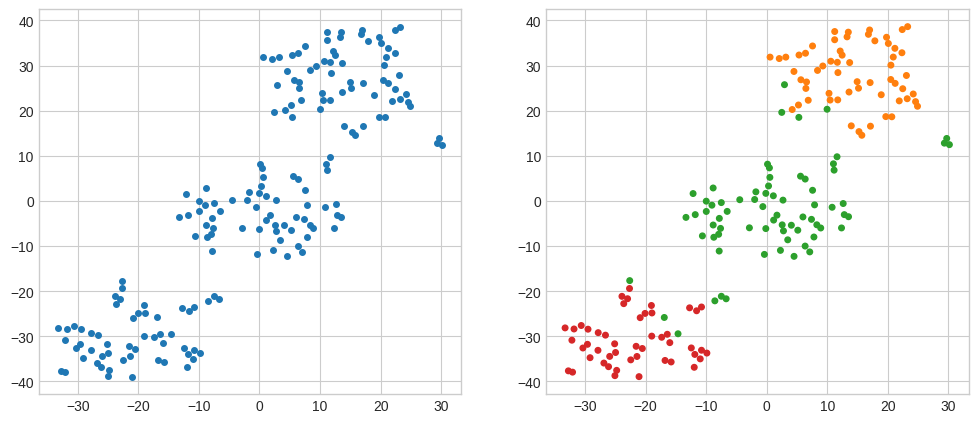

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# standardize the data first
scaler = StandardScaler()
_X = scaler.fit_transform(X)

model = TSNE(n_components=2,
             perplexity=10,
             learning_rate=100,
             random_state=42)
_X = model.fit_transform(_X)

# visualize the cluster and color it with ground truth
scatter_2sides(_X, y)

### Compare to PCA?

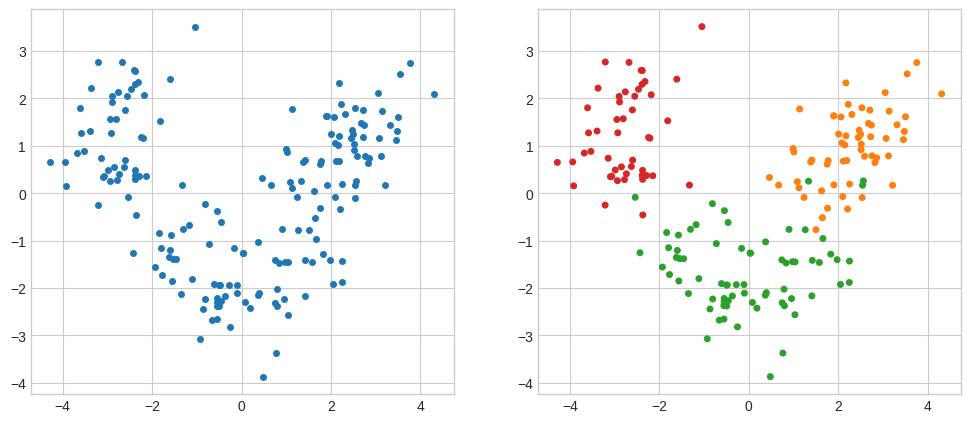

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_X = scaler.fit_transform(X)
model = PCA(n_components=2)
_X = model.fit_transform(_X)

# visualize the cluster and color it with ground truth
scatter_2sides(_X, y)

In [ ]:
# Another example for compring PCA and t-SNE
# Source https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/
# Generate a synthetic data

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

A = np.random.normal(scale=1, size=(100,3))
B = np.array([x for x in np.random.normal(scale=5, size=(500,3)) if np.linalg.norm(x) > 7])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(A[:,0], A[:,1], A[:, 2])
ax.scatter(B[:,0], B[:,1], B[:, 2])

<Figure size 640x480 with 0 Axes>

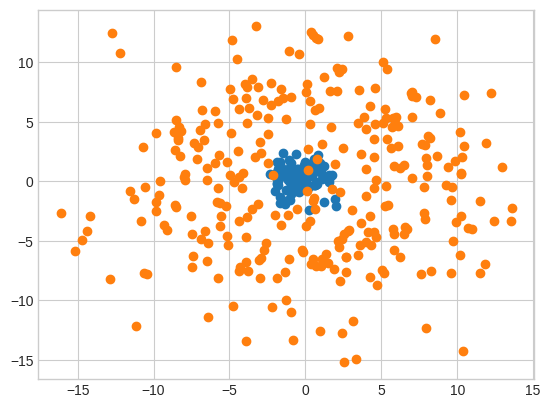

In [ ]:
from sklearn.decomposition import PCA
X = np.r_[A,B]
X2 = PCA(n_components=2).fit_transform(X)
A2 = X2[:A.shape[0],:]
B2 = X2[A.shape[0]:,:]
plt.scatter(A2[:,0], A2[:,1])
plt.scatter(B2[:,0], B2[:,1])

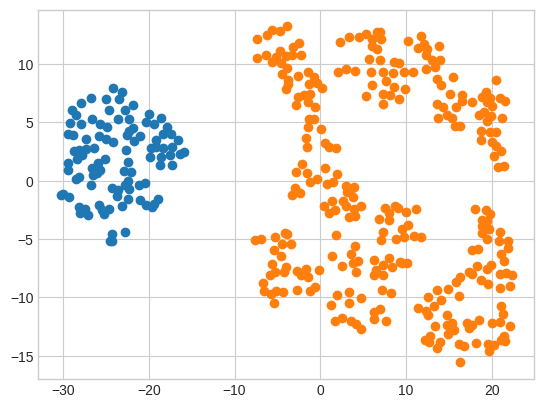

In [ ]:
from sklearn.manifold import TSNE
X3 = TSNE(n_components=2).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

In [ ]:
# Try to run the above TSNE code for another time
def plot_tsne():
  X3 = TSNE(n_components=2).fit_transform(X)
  A3 = X3[:A.shape[0],:]
  B3 = X3[A.shape[0]:,:]
  plt.scatter(A3[:,0], A3[:,1])
  plt.scatter(B3[:,0], B3[:,1])

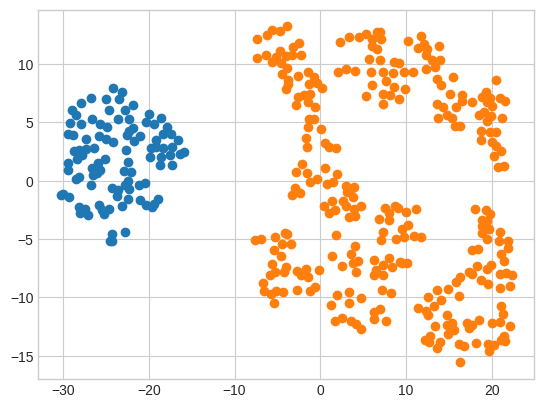

In [ ]:
plot_tsne()

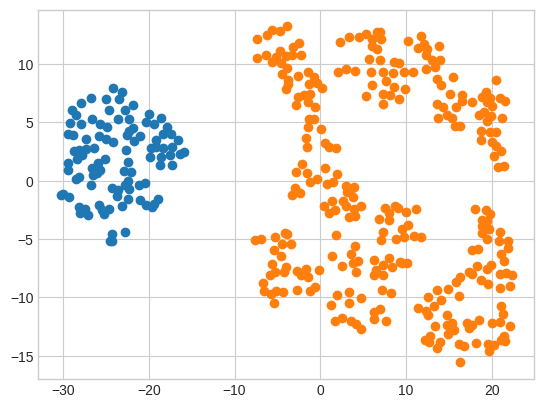

In [ ]:
plot_tsne()

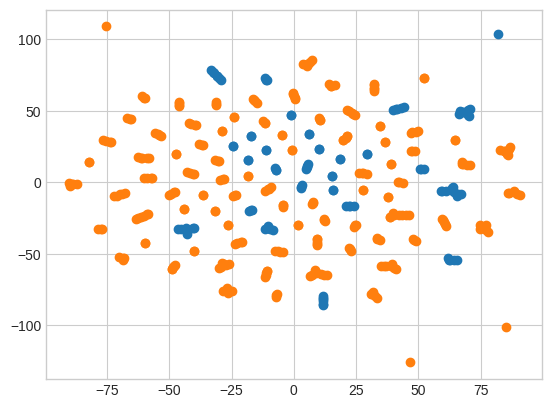

In [ ]:
# Try different perplexity
from sklearn.manifold import TSNE
X3 = TSNE(n_components=2, perplexity=1).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

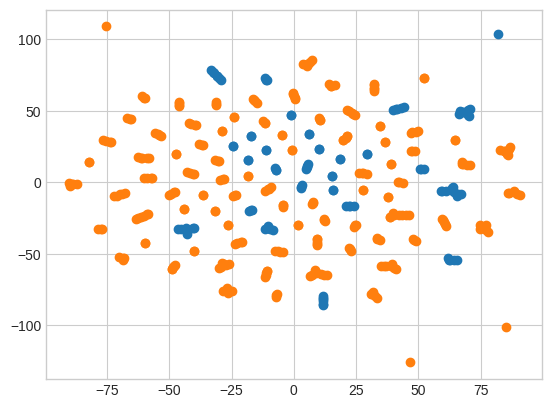

In [ ]:
from sklearn.manifold import TSNE
X3 = TSNE(n_components=2, perplexity=1).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

## t-SNE on MNIST dataset

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [ ]:
print('X:', X.shape)
print('y:', y.shape)

X: (70000, 784)
y: (70000,)


### Samples from MNIST

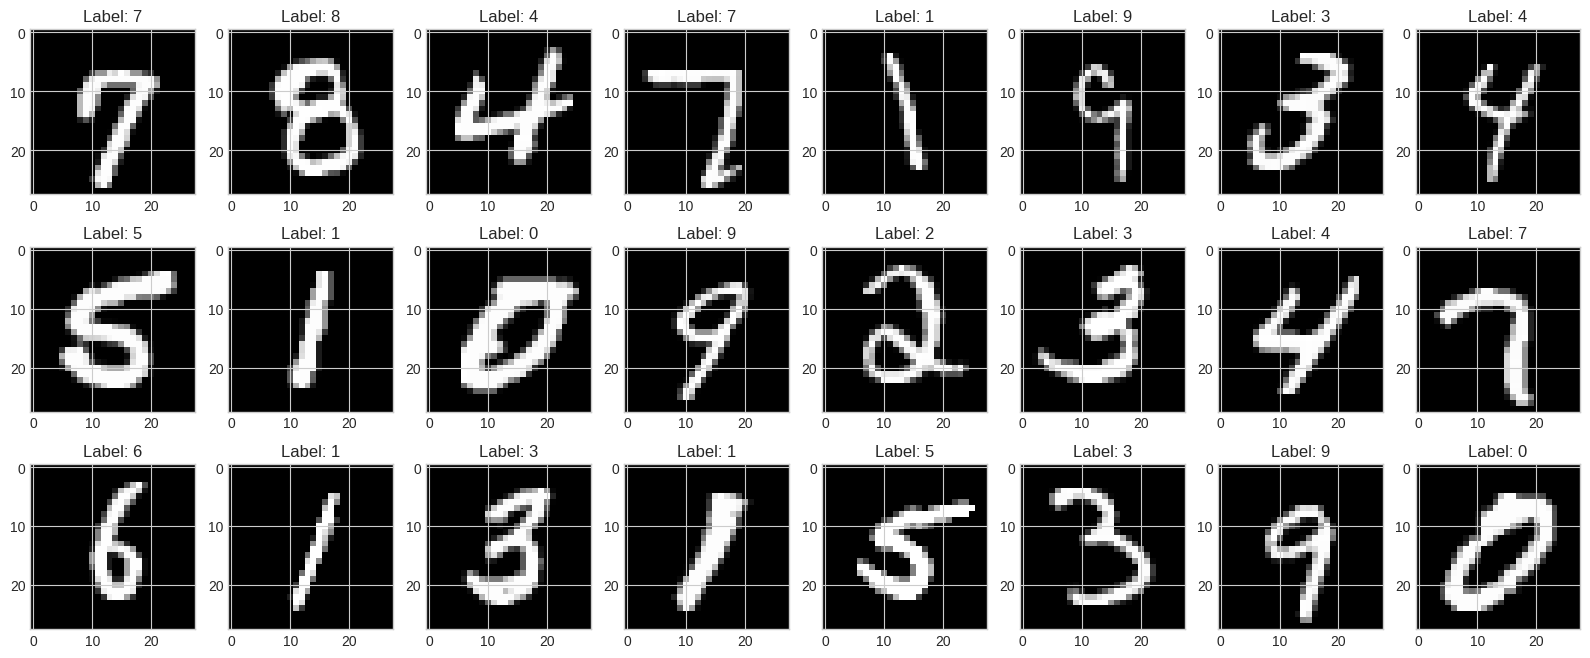

In [ ]:
idx = np.random.choice(len(X), 24)
fig, ax = plt.subplots(3, 8, figsize=(20, 8))
ax = [*ax[0], *ax[1], *ax[2]]
for i in range(len(idx)):
  img = X[idx[i]].reshape(28, 28)
  ax[i].set_title(f'Label: {y[idx[i]]}')
  ax[i].imshow(img, cmap='gray')

## Selecting a small subset from the MNIST (t-SNE is too slow)

In [ ]:
n = 3000
np.random.seed(42)
idx = np.random.choice(len(X), n)
Xs = X[idx]
ys = np.array([int(i) for i in y[idx]])
print('X:', Xs.shape)
print('Y:', ys.shape)
print(ys[:3])

X: (3000, 784)
Y: (3000,)
[0 0 1]


## Naively using PCA

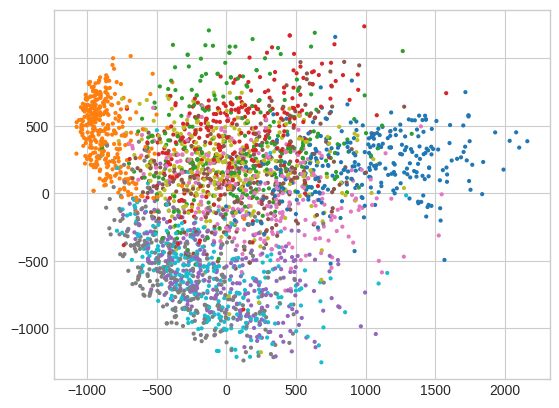

In [ ]:
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA(n_components=2)
# Apply the fit_transform method of model to grains: pca_features
_X = model.fit_transform(Xs)

scatter(_X, ys)

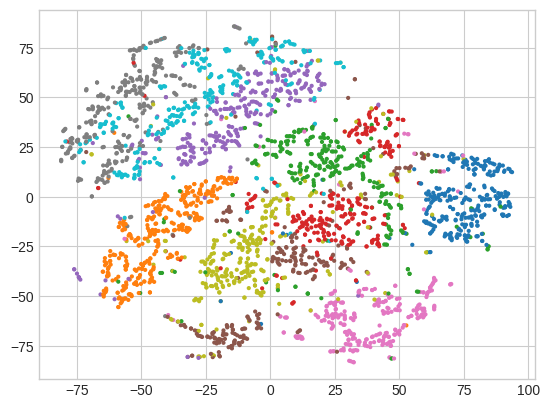

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Standardize the data first
scaler = StandardScaler()
Xs_scaled = scaler.fit_transform(Xs)

# Apply t-SNE
# Using the same parameters as the wine dataset for a starting point
model = TSNE(n_components=2,
             perplexity=10,
             learning_rate=100,
             random_state=42)
Xs_tsne = model.fit_transform(Xs_scaled)

# Visualize the t-SNE output
scatter(Xs_tsne, ys)

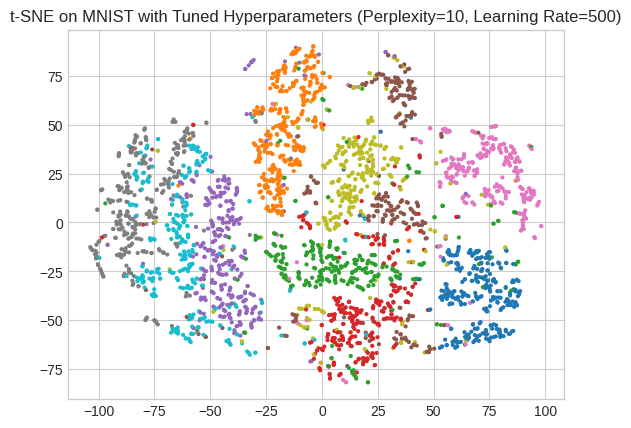

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Standardize the data first
scaler = StandardScaler()
Xs_scaled = scaler.fit_transform(Xs)

# Apply t-SNE with potentially better hyperparameters
model = TSNE(n_components=2,
             perplexity=10,
             learning_rate=500,
             random_state=42)
Xs_tsne_tuned = model.fit_transform(Xs_scaled)

# Visualize the tuned t-SNE output
plt.figure()
scatter(Xs_tsne_tuned, ys)
plt.title('t-SNE on MNIST with Tuned Hyperparameters (Perplexity=10, Learning Rate=500)')
plt.show()

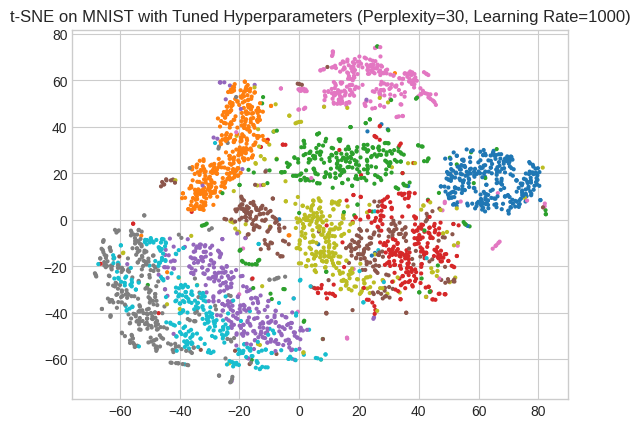

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Standardize the data first
scaler = StandardScaler()
Xs_scaled = scaler.fit_transform(Xs)

# Apply t-SNE with potentially better hyperparameters
model = TSNE(n_components=2,
             perplexity=30,
             learning_rate=500,
             random_state=42)
Xs_tsne_tuned = model.fit_transform(Xs_scaled)

# Visualize the tuned t-SNE output
plt.figure()
scatter(Xs_tsne_tuned, ys)
plt.title('t-SNE on MNIST with Tuned Hyperparameters (Perplexity=30, Learning Rate=500)')
plt.show()

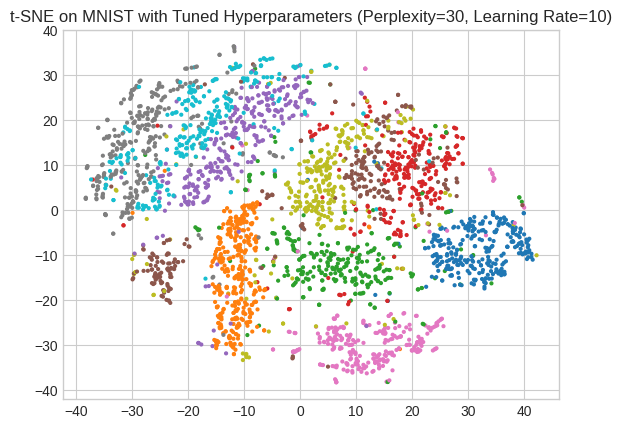

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Standardize the data first
scaler = StandardScaler()
Xs_scaled = scaler.fit_transform(Xs)

# Apply t-SNE with potentially better hyperparameters
model = TSNE(n_components=2,
             perplexity=30,
             learning_rate=10,
             random_state=42)
Xs_tsne_tuned = model.fit_transform(Xs_scaled)

# Visualize the tuned t-SNE output
plt.figure()
scatter(Xs_tsne_tuned, ys)
plt.title('t-SNE on MNIST with Tuned Hyperparameters (Perplexity=30, Learning Rate=10)')
plt.show()